### ***Importing Libraries***

In [1]:
# importing libraries
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # visualization
%matplotlib inline

import seaborn as sns
# increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, roc_curve, auc, classification_report
import warnings
warnings.filterwarnings('ignore')

## ***Data Acquisition***


In [2]:
# mount google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# raw data in panda dataframe
df = pd.read_csv('/content/drive/MyDrive/CSE 445 Project/Online Education Cleanded Dataset.csv')
print('Data Frame Shape: \n{}'.format(df.shape))
#df.columns = df.columns.str.replace('Used smartphone/computer/laptop previously before online class?',
#'Used Electronic Devices?')
# shows five instances of the dataframe

# drops the first column of the dataset
df = df.iloc[: , 1:]
print('First few instances of the dataset: ')
df.head()

Data Frame Shape: 
(5715, 18)
First few instances of the dataset: 


,Level of study?,Age?,Used Electronic Devices??,Result increased after online education (comparatively)?,Knowledge increased after online education (comparatively)?,Happy with online education?,Education Institute Area?,Have Internet availability?,Broadband / Mobile Internet?,Total hours of study before online education?,Total hours of study after online education?,Class performance increased in online education?,Institute Type,Current location (During Study) ?,Gender,Faced any issue with online class?,Preferred device for an online course
0,1,20.0,1,0,1,0,1,0,0,4,3,0,1,0,1,1,1
1,0,25.0,0,0,0,0,1,0,1,4,4,0,1,0,1,1,1
2,0,25.0,1,1,1,1,0,0,1,5,2,1,1,0,0,1,0
3,1,21.0,1,1,0,1,1,1,1,5,3,0,0,1,1,1,1
4,0,22.0,1,0,0,0,0,0,1,4,2,1,1,1,1,0,1


In [4]:
# columns of the dataset
df.columns

Index(['Level of study?', 'Age?', 'Used Electronic Devices??',
       'Result increased after online education  (comparatively)?',
       'Knowledge increased after online education (comparatively)?',
       'Happy with online education?', 'Education Institute Area?',
       'Have Internet availability?', 'Broadband / Mobile Internet?',
       'Total hours of study before online education?',
       'Total hours of study after online education?',
       'Class performance increased in online education?', 'Institute Type',
       'Current location (During Study) ?', 'Gender',
       'Faced any issue with online class?',
       'Preferred device for an online course'],
      dtype='object')

### ***Splitting Dataset***
*Splitting the dataset in a 70:30 ratio.
70% for training & 30% for testing* 

In [5]:
# separating attributes and target
attribute = df.drop(columns = ['Happy with online education?'])
target = df['Happy with online education?']
print('Attribute Shape: ', attribute.shape)
print('Target Shape: ', target.shape)

Attribute Shape:  (5715, 16)
Target Shape:  (5715,)


In [6]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(attribute, target, train_size = 0.8, test_size = 0.2, random_state = 0)

In [7]:
print('For training: ')
print('Attribute Shape: ', X_train.shape)
print('Target Shape: ', y_train.shape)

print('\nFor testing: ')
print('Attribute Shape: ', X_test.shape)
print('Target Shape: ', y_test.shape)

For training: 
Attribute Shape:  (4572, 16)
Target Shape:  (4572,)

For testing: 
Attribute Shape:  (1143, 16)
Target Shape:  (1143,)


In [8]:
print('Train Data:\n',y_train.value_counts())
print('Test Data:\n',y_test.value_counts())

Train Data:
 0    2949
1    1623
Name: Happy with online education?, dtype: int64
Test Data:
 0    728
1    415
Name: Happy with online education?, dtype: int64


## ***Random Forest***

In [22]:
from sklearn.ensemble import RandomForestClassifier
# class weight {0:0.777, 1:1.402}
rand_forest = RandomForestClassifier(random_state=399, class_weight='balanced')
rand_forest.fit(X_train, y_train)
prediction_test = rand_forest.predict(X_test)
prediction_train = rand_forest.predict(X_train)

# random forest model score
print('Training Score: ',rand_forest.score(X_train, y_train))
print('Training Score: ',rand_forest.score(X_test, y_test))

Training Score:  0.9870953630796151
Training Score:  0.5984251968503937


## ***RandomizedSearchCV***

In [23]:
# Number of trees in random forest
n_estimators = [20, 50, 80, 90, 95, 100, 105, 108, 110, 140, 160, 200, 230, 255, 270, 300, 320]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 9, 10, 11, 12, 13, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 7, 8, 9, 10, 13, 14, 15]
# Create the random grid
random_grid = {
      'n_estimators': n_estimators,
      'max_features': max_features,
      'max_depth': max_depth,
      'min_samples_split': min_samples_split,
      'min_samples_leaf': min_samples_leaf,
      'criterion':['entropy','gini']
      }
print(random_grid)

{'n_estimators': [20, 50, 80, 90, 95, 100, 105, 108, 110, 140, 160, 200, 230, 255, 270, 300, 320], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_split': [2, 3, 5, 7, 9, 10, 11, 12, 13, 15], 'min_samples_leaf': [1, 2, 4, 6, 7, 8, 9, 10, 13, 14, 15], 'criterion': ['entropy', 'gini']}


In [24]:
from sklearn.model_selection import RandomizedSearchCV
rand_forest = RandomForestClassifier(class_weight='balanced', random_state=100)
rand_forest_randomcv = RandomizedSearchCV(estimator=rand_forest,
                                          param_distributions=random_grid,
                                          n_iter=100,
                                          cv=5,
                                          verbose=2, 
                                          random_state=100,
                                          n_jobs=-1)
# fit the randomized model
rand_forest_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=100),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 7, 8,
                                                             9, 10, 13, 14,
                                                             15],
                                        'min_samples_split': [2, 3, 5, 7, 9, 10,
                                                              11, 12, 13, 15],
                               

In [25]:
# best parameters
rand_forest_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 255}

In [26]:
best_random_grid = rand_forest_randomcv.best_estimator_
print(best_random_grid)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=255, random_state=100)


In [27]:
# Training Accuracy Of RandomForest with best parameters
print("Training Accuracy is: ", best_random_grid.score(X_train, y_train))
# Test Accuracy Accuracy Of RandomForest with best parameters
print("Testing Accuracy is: ", best_random_grid.score(X_test, y_test))

Training Accuracy is:  0.9144794400699913
Testing Accuracy is:  0.5774278215223098


##***5 Fold CrossValidation***

In [31]:
import time
# applying k fold cross validation
from sklearn.model_selection import cross_val_predict

kfold_validation = KFold(n_splits = 5)
scores = ['accuracy', 'precision', 'recall']

print('-----------5 FOLD CROSS VALIDATION------------')
for score in scores:
    print('Metric : {}'.format(score))
    print('Training Score: ', end="")
    start_time = time.time()
    print(cross_val_score(best_random_grid, X_train, y_train, scoring=score, cv=kfold_validation).mean())
    print('Computation Time: {}'.format(time.time() - start_time))
    print()

    print('\nTesting Score: ', end="")
    start_time = time.time()
    print(cross_val_score(best_random_grid, X_test, y_test, scoring=score, cv=kfold_validation).mean())
    print('Computation Time: {}'.format(time.time() - start_time))
    print('----------------------------------------------')

-----------5 FOLD CROSS VALIDATION------------
Metric : accuracy
Training Score: 0.5809295596130621
Computation Time: 5.920968770980835


Testing Score: 0.5826898031103961
Computation Time: 2.952359199523926
----------------------------------------------
Metric : precision
Training Score: 0.3609052797801507
Computation Time: 5.390120983123779


Testing Score: 0.3770180995475113
Computation Time: 2.8747432231903076
----------------------------------------------
Metric : recall
Training Score: 0.23577491573663215
Computation Time: 5.360096454620361


Testing Score: 0.22914603406267497
Computation Time: 2.847923517227173
----------------------------------------------


In [37]:
train_accuracy = cross_val_score(best_random_grid, X_train, y_train, scoring='accuracy', cv=5)
test_accuracy = cross_val_score(best_random_grid, X_test, y_test, scoring='accuracy', cv=5)

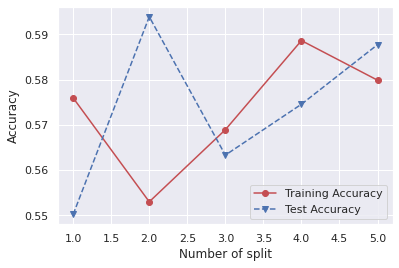

In [39]:
# plotting graph
splits = [1, 2, 3, 4, 5]
plt.plot(splits, train_accuracy, 'ro-', splits, test_accuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of split')
plt.ylabel('Accuracy');

## ***10 Fold CrossValidation***

In [32]:
import time
# applying k fold cross validation
from sklearn.model_selection import cross_val_predict
kfold_validation = KFold(n_splits = 10)

scores = ['accuracy', 'precision', 'recall']

print('-----------10 FOLD CROSS VALIDATION------------')
for score in scores:
    print('Metric : {}'.format(score))
    print('Training Score: ', end="")
    start_time = time.time()
    print(cross_val_score(best_random_grid, X_train, y_train, scoring=score, cv=kfold_validation).mean())
    print('Computation Time: {}'.format(time.time() - start_time))
    print()

    print('\nTesting Score: ', end="")
    start_time = time.time()
    print(cross_val_score(best_random_grid, X_test, y_test, scoring=score, cv=kfold_validation).mean())
    print('Computation Time: {}'.format(time.time() - start_time))
    print('----------------------------------------------')

-----------10 FOLD CROSS VALIDATION------------
Metric : accuracy
Training Score: 0.5671528766494988
Computation Time: 15.039104223251343


Testing Score: 0.5783524027459954
Computation Time: 5.911302089691162
----------------------------------------------
Metric : precision
Training Score: 0.3384727793501342
Computation Time: 11.978325366973877


Testing Score: 0.36596722634353823
Computation Time: 6.079928636550903
----------------------------------------------
Metric : recall
Training Score: 0.2304865747118841
Computation Time: 10.742878675460815


Testing Score: 0.22206569300634507
Computation Time: 5.930295467376709
----------------------------------------------


In [40]:
train_accuracy = cross_val_score(best_random_grid, X_train, y_train, scoring='accuracy', cv=10)
test_accuracy = cross_val_score(best_random_grid, X_test, y_test, scoring='accuracy', cv=10)

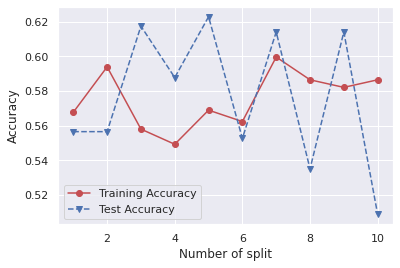

In [41]:
# plotting graph
splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(splits, train_accuracy, 'ro-', splits, test_accuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of split')
plt.ylabel('Accuracy');